In [34]:
import os
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from random import shuffle,randint
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import itertools
import seaborn as sns
from subprocess import check_output
print(check_output(["ls", "train/"]).decode("utf8"))
%matplotlib inline

a
b
c
d
e



In [35]:
IMG_SIZE = 100
TRAIN_DIR = "train/a/"
TEST_DIR = "test/"

In [36]:
training_data = []
asd = []
for label in range(5):
    c = chr(label+ord('a'))
    TRAIN_DIR = "train/" + c + "/"
    for img in tqdm(os.listdir(TRAIN_DIR)):
        if img.split('.')[-1] != "png":
            continue
        asd = []
        asd.append(label)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        for i in range(IMG_SIZE):
            for j in range(IMG_SIZE):
                asd.append(img[i][j])
        training_data.append(asd)

training_data = np.array(training_data)
np.save('train_data.npy', training_data)



100%|██████████| 184/184 [00:02<00:00, 73.83it/s]


In [37]:
train = pd.DataFrame(training_data)
print(train.shape)
train.head()

(1073, 10001)


,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0,196,197,196,196,197,196,195,194,195,...,96,96,95,95,94,85,92,94,95,95
1,0,168,172,172,173,173,172,174,174,173,...,146,148,149,149,149,150,150,150,152,208
2,0,177,191,191,190,190,189,189,189,188,...,89,88,90,89,90,90,91,92,91,91
3,0,189,190,190,189,189,190,190,188,189,...,135,135,134,133,133,133,133,133,133,134
4,0,209,208,207,208,208,207,207,206,206,...,163,164,162,161,159,159,159,158,159,159


In [38]:
z_train = Counter(train[0])
z_train

Counter({0: 224, 1: 201, 2: 250, 3: 215, 4: 183})

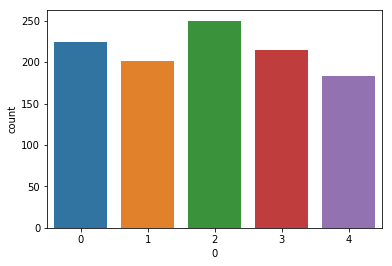

In [39]:
sns.countplot(train[0])

In [40]:
testing_data = []
asd = []
for img in tqdm(os.listdir(TEST_DIR)):
    asd = []
    path = os.path.join(TEST_DIR,img)
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    for i in range(IMG_SIZE):
        for j in range(IMG_SIZE):
            asd.append(img[i][j])
    testing_data.append(asd)

testing_data = np.array(testing_data)
#shuffle(training_data)
np.save('test_data.npy', testing_data)

100%|██████████| 50/50 [00:00<00:00, 102.69it/s]


In [41]:
test= pd.DataFrame(testing_data)
print(test.shape)
test.head()

(50, 10000)


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,155,163,167,171,173,175,174,174,174,173,...,97,97,96,96,97,97,95,95,95,83
1,187,167,204,203,202,203,202,203,202,203,...,140,139,141,140,140,140,140,140,139,138
2,203,204,171,204,203,204,205,204,204,204,...,161,162,163,162,162,162,163,162,162,162
3,162,116,110,160,168,168,169,169,168,168,...,88,85,89,87,86,88,87,89,88,186
4,213,214,214,214,212,215,215,214,214,210,...,206,207,207,206,206,186,206,207,207,207


In [42]:
x_train = (train.ix[:,1:].values).astype('float32') # all pixel values
y_train = train.ix[:,0].values.astype('int32') # only labels i.e targets digits
x_test = test.values.astype('float32')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


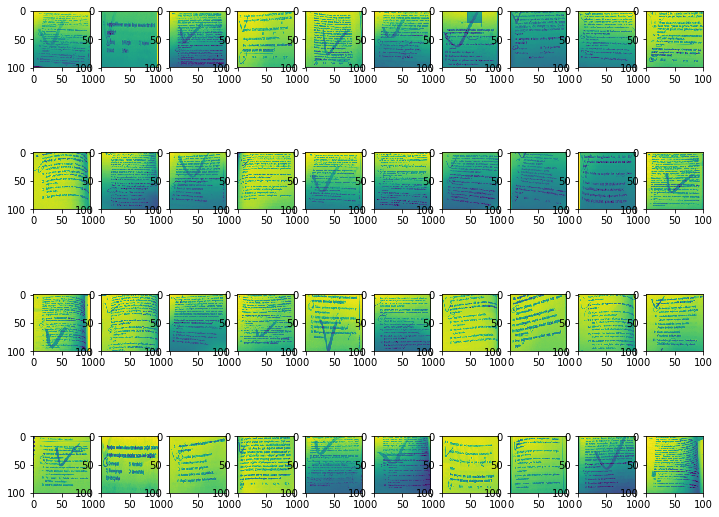

In [43]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((IMG_SIZE,IMG_SIZE)),interpolation='nearest')
plt.show()

In [44]:
x_train = x_train/255.0
x_test = x_test/255.0

In [45]:
X_train = x_train.reshape(x_train.shape[0], IMG_SIZE, IMG_SIZE,1)
X_test = x_test.reshape(x_test.shape[0], IMG_SIZE, IMG_SIZE,1)

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import tensorflow as tf
batch_size = 64
num_classes = 5
epochs = 1
input_shape = (IMG_SIZE, IMG_SIZE, 1)

In [47]:
y_train = keras.utils.to_categorical(y_train, num_classes)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

In [48]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation(tf.nn.softmax))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [49]:
datagen.fit(X_train)
h = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction],)

Epoch 1/1
15/15 [==============================] - 78s 5s/step - loss: 1.8219 - acc: 0.2009 - val_loss: 1.9051 - val_acc: 0.2500


In [50]:
predicted_classes = model.predict_classes(X_test)

In [51]:
print(predicted_classes)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [52]:
y_true = test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [53]:
#TODO: There are some bugs which I couldn't debug :(

#from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
#print(classification_report(y_true, predicted_classes, target_names=target_names))

In [54]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)),
                         "Label": predicted_classes})
submissions.to_csv("submission.csv", index=False, header=True)

In [55]:
model.save('my_model_1.h5')
json_string = model.to_json()